# **Final Project - Part 2**
## Data Visualization
*By Ethan Lee, Tyler Ngo, Diane Li, James Dai*

The second part of our submission is the data visualization section. In this
section, we visualize and interpret the data that we collected in part 1.

In the following data visualizations, our group explores
the relationship between Apple's closing stock price and
its daily corresponding Twitter sentiment. This is done by
gathering 100 tweets a day via the Twitter API and putting
it through Google Cloud Natural language processing. These
graphs show the relationships between stock price and
sentiment as well as those two values against time.

We begin by importing the necessary libraries.

In [100]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

Now we read the twitter sentiment data into pandas dataframes. The nature of
the data's original format requires that some housekeeping be done. The final
result is a dataframe called *data* that contains 3 columns: tweets, the
associated sentiment score, and the date that these values were recorded.

In [101]:
#read all of the data into a csv file

li = []
dates = []
paths = glob.glob("data/*.csv")

for filename in paths:
    str = "data/" + filename[5:]
    df = pd.read_csv(str, names=['tweet', 'sentiment'])

    if (filename[5:8] == 'nov'):
        df['date'] = '2020-11-' + filename[8:10]
    else:
        df['date'] = '2020-12-' + filename[8:10]

    li.append(df)

data = pd.concat(li, ignore_index=True)
data

,tweet,sentiment,date
0,b'Actress black widow 2020 HD Mobile Wallpaper...,0.2,2020-12-01
1,b'RT @TmarTn: 2 PS5s\nXbox Series X &amp; S\nN...,0.0,2020-12-01
2,b'RT @haeckerfelix: Running Purism Librem 5 sy...,0.0,2020-12-01
3,b'Escucha la Mejor Estacion LMM URBAN RADIO: ...,0.2,2020-12-01
4,b'iPhone https://t.co/59rmuhrM9I',0.3,2020-12-01
...,...,...,...
1995,"b""RT @arkh: We'll give an iPhone 12 Pro MAX (2...",0.0,2020-11-30
1996,b'RT @Flossycarter: iPhone 12/ 12 Pro / 12 Pro...,0.0,2020-11-30
1997,"b""RT @arkh: We'll give an iPhone 12 Pro MAX (2...",0.0,2020-11-30
1998,b'@tombatemann I have an iPhone 5. That guy is...,-0.5,2020-11-30


Now we read the stock data that corresponds to the dates into a dataframe from
a csv file.

In [102]:
stocks = pd.read_csv("stocks.csv")
stocks

,date,apple_stock_closing_price ($)
0,2020-11-09,116.32
1,2020-11-10,115.97
2,2020-11-11,119.49
3,2020-11-12,119.21
4,2020-11-13,119.26
5,2020-11-16,120.30
6,2020-11-17,119.39
7,2020-11-18,118.03
8,2020-11-19,118.64
9,2020-11-20,117.34


After grouping by dates and counting the number of values in *data*, we can see
that there was 100 data points associated with each date. This is how many that
the Twitter API allowed us to collect.

In [103]:
data.groupby('date').count()

,tweet,sentiment
date,,
2020-11-09,100,100
2020-11-10,100,100
2020-11-11,100,100
2020-11-12,100,100
2020-11-13,100,100
2020-11-16,100,100
2020-11-17,100,100
2020-11-18,100,100
2020-11-19,100,100


In order to make *data* useful for visualization, we decided to sum the sentiment
 values after grouping by dates.

In [104]:
by_date_sum = data.groupby('date').sum()
by_date_sum

,sentiment
date,
2020-11-09,-1.2
2020-11-10,-5.0
2020-11-11,-5.8
2020-11-12,-12.7
2020-11-13,-4.9
2020-11-16,-1.7
2020-11-17,-7.8
2020-11-18,1.2
2020-11-19,-8.3


A brief look at the scatter plots of the two dataframes shows that the data do
not look particularly similar in shape.

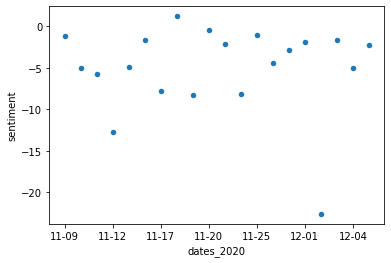

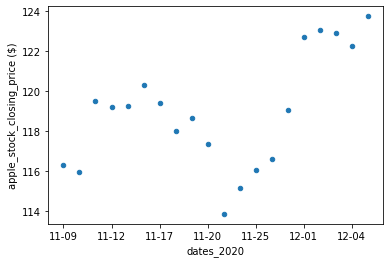

In [105]:
def trim(str):
    return str[5:]
dates_t = by_date_sum.reset_index().get("date").apply(trim)

ax1 = by_date_sum.reset_index().assign(dates_2020=dates_t).plot(kind="scatter", x='dates_2020', y='sentiment')
ax2 = stocks.reset_index().assign(dates_2020=dates_t).plot(kind="scatter", x="dates_2020", y="apple_stock_closing_price ($)")
ax1.set_xticks(ax1.get_xticks()[::3])
ax2.set_xticks(ax2.get_xticks()[::3])

We now plot a scatter plot with x being twitter sentiment and y being the stock
price associated with it. We see that there is not a very strong correlation, if
any.

<AxesSubplot:xlabel='sentiment', ylabel='stock_price'>

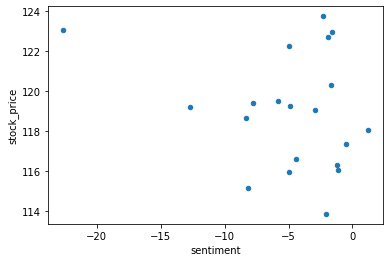

In [106]:
df = stocks.assign(
    sentiment=by_date_sum.reset_index().get("sentiment"),
    stock_price=stocks.reset_index().get("apple_stock_closing_price ($)")
)
df.plot(
    kind='scatter',
    x='sentiment',
    y='stock_price'
)

Now, using a scipy.stats function, we calculate the slope, intercept, and r-value
of the regression line.

In [107]:
lr = linregress(
    x=by_date_sum.reset_index().get("sentiment"),
    y=stocks.reset_index().get("apple_stock_closing_price ($)")
)

slope = lr[0]
intercept = lr[1]
r = lr[2]

Using the data collected above, we plotted a linear regression line alongside
of the previous scatter plot. Below this, the value of the correlation
coefficient r is printed.

Value of r: 
-0.24332341564658164


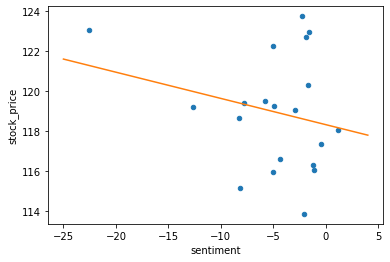

In [108]:
df.plot(
    kind='scatter',
    x='sentiment',
    y='stock_price'
)
x = np.arange(-25,5,1)
plt.plot(x, slope * x + intercept, color='C1')

print("Value of r: ")
print(r)

## Conclusion
From the calculated value of r, we conclude that although there seems to be a
very slight negative correlation between Twitter sentiment on a given day and
the closing stock price, it is not substantial enough to concretely establish the
presence of a relationship.